In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [3]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    #display(data.describe())
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    data_sig = data[['significance']]
    data_val = data.drop(columns=['flux_significance' ,  'index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name'])
    
    #display(data_val)
    #import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)

    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        max  = np.amax(data_val[d])
        #data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / max
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_id , data_sig 

In [4]:
train_bh = pd.read_csv('processed_data/BH_train.csv')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_train.csv')
train_ns = train_ns.sample(frac=1)
#display(data_ns)
display(train_ns.describe())



train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_id , data_sig = filter_data(train)
display(data_val.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,196.000000,196.000000,196.000000,196.000000,1.930000e+02,193.000000,193.000000,139.000000,139.000000,139.000000,...,47.000000,47.000000,45.000000,47.000000,47.000000,46.000000,47.000000,47.000000,47.000000,37.000000
mean,14.862245,59402.678061,138.639796,174826.660206,3.287452e-04,0.801937,5.890674,0.120123,0.074414,0.094797,...,12.146017,12.077670,12.649644,5.955149,950.466589,883.404853,0.930015,0.817519,738.218619,839.425676
std,19.749103,53823.899344,152.797198,218792.266306,7.414555e-04,0.161362,1.867629,0.533752,0.373784,0.428364,...,1.032850,0.959872,44.447784,14.426922,715.590015,671.621356,0.561396,0.399142,569.935982,458.292015
min,0.000000,4256.000000,1.840000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,10.713993,10.694434,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,2.000000,18251.500000,14.070000,1205.131000,5.171680e-07,0.807400,5.200000,0.000359,0.000218,0.000230,...,11.327724,11.312185,1.771000,1.532500,62.105000,56.785000,0.774600,0.691900,23.565000,425.600000
50%,5.000000,41016.850000,26.510000,4017.937000,1.183580e-05,0.830200,7.000000,0.000871,0.000566,0.000619,...,11.820448,11.766243,1.930000,1.724000,1415.000000,1311.000000,0.833400,0.777300,1062.000000,1117.000000
75%,21.250000,75682.200000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.018506,0.008889,0.011905,...,13.029830,12.987179,4.313000,3.117000,1560.500000,1469.750000,0.868600,0.822800,1226.000000,1146.000000
max,70.000000,184208.000000,337.000000,462011.400000,3.960122e-03,1.000000,8.000000,4.403000,3.219000,3.219000,...,14.354381,14.233364,268.600000,81.320000,1644.000000,1559.000000,3.964000,2.682000,1300.000000,1231.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,444.000000,444.000000,444.000000,4.440000e+02,3.620000e+02,362.000000,362.000000,240.000000,240.000000,240.000000,...,89.000000,89.000000,75.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,63.000000
mean,20.317568,17768.214640,76.654595,inf,1.285977e-03,0.864793,6.424217,0.099555,0.084872,0.089676,...,11.906666,11.853320,6.037916,13.849285,240.669438,210.147932,1.757757,0.746182,149.226413,164.183652
std,23.344521,20929.538298,104.446038,inf,2.862941e-03,0.218248,2.191820,0.366372,0.354697,0.357252,...,0.901398,0.861392,12.088292,28.614688,360.288045,305.511685,8.755496,0.602857,251.527625,217.618784
min,0.000000,916.000000,1.870000,9.272045e+00,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,9.764219,9.755723,0.357500,0.289700,10.860000,3.825000,0.216200,0.189000,0.007671,0.000000
25%,3.000000,4105.725000,5.462500,1.403164e+02,7.351000e-06,0.759600,5.200000,0.001618,0.000931,0.001154,...,11.401757,11.375718,0.778850,0.677600,34.860000,27.147500,0.344200,0.303300,7.737000,20.470000
50%,10.500000,7258.500000,49.260000,1.504925e+03,1.176452e-05,1.000000,7.800000,0.005555,0.003026,0.004070,...,11.937794,11.880744,1.249000,1.209000,53.250000,45.030000,0.555300,0.532200,29.890000,97.740000
75%,32.000000,27885.000000,107.710000,9.049175e+03,1.277774e-03,1.000000,8.000000,0.054817,0.033354,0.048235,...,12.399790,12.352715,5.395500,6.741000,213.600000,195.600000,1.023000,0.869200,135.400000,134.300000
max,94.000000,166689.200000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,4.011572,4.008746,4.009324,...,13.691649,13.522011,75.050000,99.720000,1712.000000,1195.000000,83.130000,2.837000,1211.000000,753.100000


,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,var_sigma,kp_prob,ks_prob,var_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.018156,0.769775,0.706454,0.010365,0.027478,0.033997,0.005852,0.362176,0.364471,0.307525,...,0.146470,0.146688,0.017294,0.007691,0.021694,0.019524,0.003505,0.033517,0.020241,0.015853
std,0.077418,0.308244,0.337419,0.052564,0.083312,0.092661,0.050307,0.301976,0.306739,0.243330,...,0.329357,0.329746,0.079351,0.054021,0.120214,0.113410,0.047764,0.094320,0.122022,0.107272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000023,0.759600,0.562500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000330,0.835600,0.875000,0.000664,0.002444,0.002552,0.000184,0.398194,0.383272,0.366149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003747,1.000000,1.000000,0.004251,0.012424,0.017219,0.001027,0.596352,0.610116,0.488009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_data[['flux_aper_hilim' , 'flux_aper_lolim' ,'flux_aper']].describe()

,flux_aper_hilim,flux_aper_lolim,flux_aper
count,440.000000,440.000000,440.000000
mean,13.905354,14.486547,14.171078
std,0.827189,1.133711,0.934156
min,11.886136,12.022661,12.009448
25%,13.337670,13.748880,13.529079
50%,13.897466,14.492019,14.202520
75%,14.548175,15.236830,14.837463
max,16.031949,17.980053,16.724746


In [6]:
data_bh_clean = train_data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = train_data[data_class['class']=='NS']
display(data_ns_clean.describe())

,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,152.000000,152.000000,152.000000,152.000000,1.490000e+02,149.000000,149.000000,112.000000,112.000000,112.000000,...,24.000000,24.000000,23.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,14.000000
mean,10.664474,66826.644079,114.732237,142083.236421,1.573601e-04,0.794317,5.715101,0.007248,0.003710,0.004399,...,12.942296,12.829105,4.906348,5.966875,468.447488,404.352750,0.872675,0.712267,357.518963,490.360000
std,15.618356,55866.763702,147.316646,211526.456353,2.190009e-04,0.162622,1.912404,0.027555,0.009989,0.011342,...,0.847684,0.759457,4.968386,16.129555,654.094297,590.063893,0.698905,0.448730,523.250272,513.463617
min,0.000000,4256.000000,2.110000,11.367330,1.352975e-07,0.302750,0.750000,0.000105,0.000057,0.000061,...,11.820448,11.766243,1.535000,1.160000,0.648700,0.083260,0.402400,0.360300,0.100100,10.730000
25%,1.750000,25256.900000,14.070000,1205.131000,4.777600e-07,0.807400,4.800000,0.000325,0.000179,0.000194,...,12.210338,12.165163,2.245000,1.478750,11.612750,5.769500,0.548050,0.496575,0.991300,21.342500
50%,4.500000,45343.250000,17.390000,1313.561000,1.771040e-06,0.830200,7.000000,0.000539,0.000311,0.000330,...,13.029830,12.987179,3.550000,2.280500,66.240000,57.580000,0.793500,0.691900,27.225000,329.150000
75%,10.000000,83357.325000,337.000000,462011.400000,4.811690e-04,0.847800,7.000000,0.002863,0.002170,0.002251,...,13.323269,13.185855,4.792500,3.456000,922.675000,588.750000,0.841275,0.752400,738.650000,1097.500000
max,70.000000,184208.000000,337.000000,462011.400000,4.811690e-04,1.000000,8.000000,0.264078,0.057274,0.060776,...,14.354381,14.233364,24.980000,81.320000,1627.000000,1485.000000,3.964000,2.682000,1299.000000,1169.000000


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,288.000000,288.000000,288.000000,2.880000e+02,2.520000e+02,252.000000,252.000000,199.000000,199.000000,199.000000,...,49.000000,49.000000,46.000000,49.000000,49.000000,48.000000,49.000000,49.000000,49.000000,28.000000
mean,21.173611,19479.384722,51.761146,inf,6.124296e-04,0.874396,6.488757,0.021785,0.010275,0.012838,...,12.540337,12.464466,3.455798,2.693439,104.061224,72.020063,2.188680,0.458331,60.985810,46.035821
std,26.045746,21007.812054,80.620503,inf,2.248977e-03,0.217187,2.217818,0.084701,0.023171,0.025455,...,0.557011,0.504375,6.747395,5.496750,272.484009,156.551289,11.809504,0.307799,192.933092,86.383676
min,0.000000,977.000000,2.320000,1.257282e+01,3.118000e-08,0.126000,0.000000,0.000151,0.000102,0.000103,...,11.472370,11.449283,0.357500,0.289700,11.910000,6.983000,0.216200,0.189000,0.077480,0.000000
25%,2.000000,4112.125000,6.770000,1.627296e+02,7.351000e-06,0.794000,5.200000,0.001406,0.000777,0.000859,...,12.177963,12.135845,0.669675,0.577800,24.800000,19.560000,0.289400,0.275000,1.131000,14.370000
50%,8.000000,12178.500000,41.030000,5.716484e+03,7.351000e-06,1.000000,8.000000,0.003617,0.001967,0.002380,...,12.350373,12.305044,0.850750,0.693900,42.410000,34.720000,0.354100,0.318000,20.170000,20.470000
75%,35.000000,28597.000000,49.260000,9.049175e+03,4.857080e-05,1.000000,8.000000,0.011974,0.005730,0.008049,...,13.017684,12.959398,1.723000,2.429000,51.720000,44.040000,0.657600,0.537500,29.650000,31.610000
max,94.000000,158025.600000,476.940000,1.797693e+308,2.225360e-02,1.000000,8.000000,1.128588,0.203490,0.203719,...,13.691649,13.522011,35.720000,32.540000,1712.000000,800.600000,83.130000,1.651000,1211.000000,455.500000


In [7]:
def split_data(x,y,s,id,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    id_train = id[:split_no]
    id_test = id[split_no:]
    return (x_train , y_train , s_train , id_train ) , (x_test , y_test , s_test , id_test)

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s
#s = [float(si) for si in s]
(x_train , y_train , s_train , id_train) , (x_test , y_test , s_test , id_test) =  split_data(x, y,s, data_id , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(440, 92) (440, 1)
(0, 92) (0, 1)


# Neural Network

In [8]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [9]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = desc_class.value_counts()['NS']
bh_n= desc_class.value_counts()['BH']
print(ns_n , bh_n)

288 152


In [30]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])
np.random.seed(232323232)
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=100, validation_split=0.2  , sample_weight=s_train*5)


Epoch 1/100
11/11 [==============================] - 3s 115ms/step - loss: 252.1769 - accuracy: 0.6131 - val_loss: 262.8038 - val_accuracy: 0.7045
Epoch 2/100
11/11 [==============================] - 0s 43ms/step - loss: 259.4791 - accuracy: 0.6528 - val_loss: 259.8656 - val_accuracy: 0.6932
Epoch 3/100
11/11 [==============================] - 0s 34ms/step - loss: 217.9523 - accuracy: 0.6520 - val_loss: 254.7308 - val_accuracy: 0.6932
Epoch 4/100
11/11 [==============================] - 0s 43ms/step - loss: 228.8779 - accuracy: 0.6489 - val_loss: 249.3615 - val_accuracy: 0.6932
Epoch 5/100
11/11 [==============================] - 0s 46ms/step - loss: 222.1295 - accuracy: 0.6245 - val_loss: 241.5245 - val_accuracy: 0.6932
Epoch 6/100
11/11 [==============================] - 1s 51ms/step - loss: 208.4442 - accuracy: 0.6423 - val_loss: 232.4368 - val_accuracy: 0.6932
Epoch 7/100
11/11 [==============================] - 0s 39ms/step - loss: 181.3502 - accuracy: 0.6366 - val_loss: 221.6139 

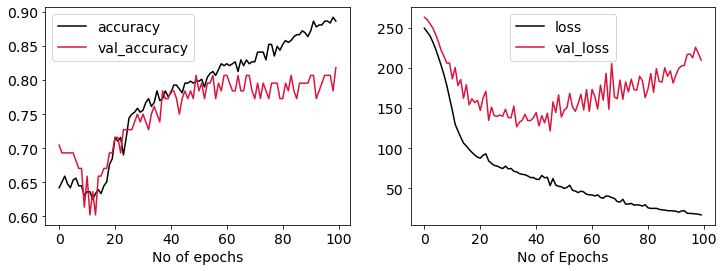

In [32]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

In [12]:
model.save('models/NN_NS_BH.mdl')
#np.save('test_data/NN_NS_BH.cv' , x_test)
#np.save('test_data/NN_NS_BH_label.cv' , one_hot_y_test)

2021-10-04 16:22:39.277291: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/NN_NS_BH.mdl/assets


In [13]:
import seaborn as sns

In [14]:
%reload_ext autoreload

In [15]:
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

In [16]:
font = {'size'   : 14}
plt.rc('font', **font)

In [17]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

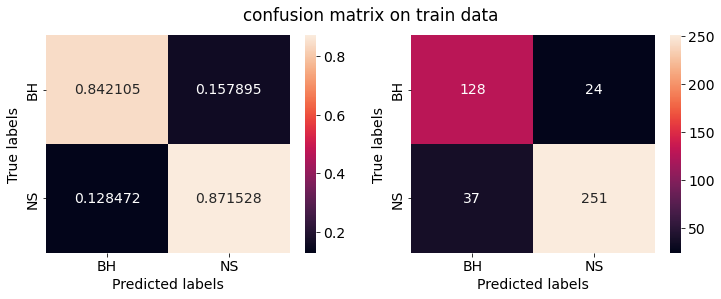

In [18]:
cf = conf_matrix(model , x_train, one_hot_y_train)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels'); 
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']); 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

## TEST

In [19]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
display(test_bh.describe())
test_ns = pd.read_csv('processed_data/NS_test.csv')
test_pulsar = pd.read_csv('processed_data/PULSAR.csv')
test_cv = pd.read_csv('processed_data/CV.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test = test.sample(frac=1)
test_data , t_val , t_class , t_id , t_sig = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

/home/kumaran/miniconda3/envs/ciao-4.13/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/kumaran/miniconda3/envs/ciao-4.13/lib/python3.8/site-packages/numpy/lib/function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


,index,livetime,significance,likelihood,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,7.000000,7.000000,7.000000,...,1.000000,1.000000,1.000,1.000,1.00,1.00,1.0000,1.000,1.0,1.00
mean,3.428571,24752.907143,9.953571,770.519286,1.589223e-06,0.862181,5.985714,0.002635,0.001620,0.001855,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
std,3.106180,8954.116678,5.915179,1180.940914,1.862492e-07,0.206559,1.853835,0.001572,0.001245,0.001450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,11007.400000,6.900000,155.700000,1.470060e-06,0.492600,2.600000,0.000454,0.000305,0.000312,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
25%,1.000000,19992.250000,6.900000,155.700000,1.561667e-06,0.837133,6.250000,0.001452,0.000655,0.000753,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
50%,2.500000,21837.150000,6.900000,155.700000,1.561667e-06,0.980333,7.000000,0.003014,0.000975,0.001075,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
75%,5.750000,28593.975000,7.552500,331.831500,1.561667e-06,0.980333,7.000000,0.003887,0.002780,0.003226,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05
max,9.000000,40036.900000,20.860000,2946.576000,2.222280e-06,0.980333,7.000000,0.004297,0.003189,0.003639,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05


,var_inter_sigma,var_inter_prob,var_inter_index,var_max,var_min,var_mean,var_sigma,kp_prob,ks_prob,var_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.162791,0.731773,0.590927,0.069082,0.052256,0.056933,0.043985,0.534359,0.505769,0.526495,...,0.153816,0.154053,0.087789,0.106650,0.141562,0.077698,0.077042,0.080635,0.067541,0.059214
std,0.342491,0.200184,0.226545,0.198318,0.181150,0.185975,0.177788,0.318982,0.305476,0.263245,...,0.356919,0.357410,0.248416,0.289607,0.332620,0.245335,0.211677,0.215340,0.220163,0.206872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002228,0.690250,0.500000,0.008404,0.005536,0.006064,0.003082,0.328236,0.232726,0.426064,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.002228,0.690250,0.500000,0.017704,0.007908,0.008553,0.008058,0.526124,0.560819,0.559329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003725,0.859000,0.750000,0.035925,0.025086,0.027040,0.019428,0.842354,0.721293,0.721905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(31, 2)


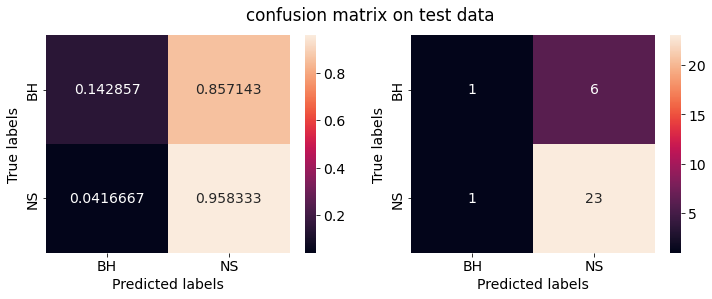

In [20]:
cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

In [21]:
y_test_pred_prob =  model.predict(x_test)
y_test_pred = []
for yi in y_test_pred_prob:
    temp = [0]*len(yi)
    temp[np.argmax(yi)] = 1
    y_test_pred.append(temp)
y_test_pred =  np.asarray(y_test_pred)
miss_cl_data = pd.DataFrame()
missed_src = []
for yp , yh , si ,  y_prob in zip(y_test_pred , one_hot_y_test , t_id , y_test_pred_prob):
    chk = np.dot(yp,yh)
    if(chk<1):
        #print(y_prob,  si)
        data_sneak = test[test['src_id'] == si]
        display(data_sneak)
        miss_cl_data = miss_cl_data.append(data_sneak)
        missed_src.append(si)
miss_src_cnt =  pd.DataFrame()
miss_src_cnt.insert(0,'src' ,missed_src)
miss_src_cnt = miss_src_cnt['src'].value_counts()
display(miss_src_cnt)
display(miss_cl_data)
#missed_src_count = missed_src.count_val()

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,BH,BH0008,IGR J17464-3213,21229.2,6.9,155.7,2008-03-22T08:06:53,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,BH,BH0008,IGR J17464-3213,13733.4,6.9,155.7,2008-03-08T16:50:50,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,BH,BH0008,IGR J17464-3213,40036.9,6.9,155.7,2004-03-27T06:28:10,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8,BH,BH0008,IGR J17464-3213,23797.4,6.9,155.7,2008-03-21T10:34:34,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7,BH,BH0008,IGR J17464-3213,20604.3,6.9,155.7,2008-03-24T05:37:46,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,9,BH,BH0008,IGR J17464-3213,28671.1,6.9,155.7,2008-03-23T07:27:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,BH,BH0008,IGR J17464-3213,11007.4,6.9,155.7,2008-03-17T02:24:07,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,BH,BH0008,IGR J17464-3213,28362.6,6.9,155.7,2004-03-24T18:10:59,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,BH,BH0008,IGR J17464-3213,20547.4,6.9,155.7,2008-03-16T05:47:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,BH,BH0008,IGR J17464-3213,22445.1,6.9,155.7,2004-02-12T20:39:58,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,BH,BH0008,IGR J17464-3213,21229.2,6.9,155.7,2008-03-22T08:06:53,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,BH,BH0008,IGR J17464-3213,13733.4,6.9,155.7,2008-03-08T16:50:50,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,BH,BH0008,IGR J17464-3213,40036.9,6.9,155.7,2004-03-27T06:28:10,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8,BH,BH0008,IGR J17464-3213,23797.4,6.9,155.7,2008-03-21T10:34:34,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7,BH,BH0008,IGR J17464-3213,20604.3,6.9,155.7,2008-03-24T05:37:46,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,9,BH,BH0008,IGR J17464-3213,28671.1,6.9,155.7,2008-03-23T07:27:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,BH,BH0008,IGR J17464-3213,11007.4,6.9,155.7,2008-03-17T02:24:07,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,BH,BH0008,IGR J17464-3213,28362.6,6.9,155.7,2004-03-24T18:10:59,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,BH,BH0008,IGR J17464-3213,20547.4,6.9,155.7,2008-03-16T05:47:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,BH,BH0008,IGR J17464-3213,22445.1,6.9,155.7,2004-02-12T20:39:58,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
4,0,NS,NS0054,BW ANT,24445.9,3.7,75.53454,2004-03-18T02:40:52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2946.576,2012-11-03T09:23:02,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2946.576,2012-10-31T17:20:25,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2946.576,2010-09-30T23:42:24,0.000001,0.4926,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,BH,BH0008,IGR J17464-3213,21229.2,6.9,155.7,2008-03-22T08:06:53,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,BH,BH0008,IGR J17464-3213,13733.4,6.9,155.7,2008-03-08T16:50:50,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,BH,BH0008,IGR J17464-3213,40036.9,6.9,155.7,2004-03-27T06:28:10,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8,BH,BH0008,IGR J17464-3213,23797.4,6.9,155.7,2008-03-21T10:34:34,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7,BH,BH0008,IGR J17464-3213,20604.3,6.9,155.7,2008-03-24T05:37:46,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,9,BH,BH0008,IGR J17464-3213,28671.1,6.9,155.7,2008-03-23T07:27:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,BH,BH0008,IGR J17464-3213,11007.4,6.9,155.7,2008-03-17T02:24:07,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,BH,BH0008,IGR J17464-3213,28362.6,6.9,155.7,2004-03-24T18:10:59,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,BH,BH0008,IGR J17464-3213,20547.4,6.9,155.7,2008-03-16T05:47:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,BH,BH0008,IGR J17464-3213,22445.1,6.9,155.7,2004-02-12T20:39:58,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2946.576,2012-11-03T09:23:02,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2946.576,2012-10-31T17:20:25,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2946.576,2010-09-30T23:42:24,0.000001,0.4926,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,2,BH,BH0003,GINGA 1354-645,19803.6,20.86,2946.576,2012-11-03T09:23:02,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BH,BH0003,GINGA 1354-645,19807.2,20.86,2946.576,2012-10-31T17:20:25,0.000001,0.4926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,BH,BH0003,GINGA 1354-645,39516.5,20.86,2946.576,2010-09-30T23:42:24,0.000001,0.4926,...,13.372737,13.236872,5.139,2.614,76.58,54.17,0.7901,0.627,35.2,13.05


BH0008    3
BH0003    3
NS0054    1
Name: src, dtype: int64

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,5,BH,BH0008,IGR J17464-3213,21229.2,6.90,155.70000,2008-03-22T08:06:53,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,BH,BH0008,IGR J17464-3213,13733.4,6.90,155.70000,2008-03-08T16:50:50,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,BH,BH0008,IGR J17464-3213,40036.9,6.90,155.70000,2004-03-27T06:28:10,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8,BH,BH0008,IGR J17464-3213,23797.4,6.90,155.70000,2008-03-21T10:34:34,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7,BH,BH0008,IGR J17464-3213,20604.3,6.90,155.70000,2008-03-24T05:37:46,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,9,BH,BH0008,IGR J17464-3213,28671.1,6.90,155.70000,2008-03-23T07:27:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,BH,BH0008,IGR J17464-3213,11007.4,6.90,155.70000,2008-03-17T02:24:07,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,BH,BH0008,IGR J17464-3213,28362.6,6.90,155.70000,2004-03-24T18:10:59,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,BH,BH0008,IGR J17464-3213,20547.4,6.90,155.70000,2008-03-16T05:47:02,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,BH,BH0008,IGR J17464-3213,22445.1,6.90,155.70000,2004-02-12T20:39:58,0.000002,0.980333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data_sneak = test[test['src_id'] == 'NS0061']
display(data_sneak)

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
